
# 1. Protein parameters analysis

The program performs most of the same functions as the Expasy ProtParam tool.
Protein parameters for analysing protein sequences. 

The program calculates:

1. Molecular weight
2. Chemicalcomposition
3. Amino acid composition
4. pI
5. Extinction coefficient
6. Secondary structure fraction
7. Hydrophobicity
8. Aliphatic Index and GRAVY


## Input sequences

```
SDTGRPFVEM YSEIPEIIHM TEGRELVIPC RVTSPNITVT LKKFPLDTLI PDGKRIIWDS
RKGFIISNAT YKEIGLLTCE ATVNGHLYKT NYLTHRQTNT IIDVVLSPSH GIELSVGEKL
VLNCTARTEL NVGIDFNWEY PSSKHQHKKL VNRDLKTQSG SEMKKFLSTL TIDGVTRSDQ
GLYTCAASSG LMTKKNSTFV RVHEKDKTHT CPPCPAPELL GGPSVFLFPP KPKDTLMISR
TPEVTCVVVD VSHEDPEVKF NWYVDGVEVH NAKTKPREEQ YNSTYRVVSV LTVLHQDWLN
GKEYKCKVSN KALPAPIEKT ISKAKGQPRE PQVYTLPPSR DELTKNQVSL TCLVKGFYPS
DIAVEWESNG QPENNYKTTP PVLDSDGSFF LYSKLTVDKS RWQQGNVFSC SVMHEALHNH
YTQKSLSLSP G
```
(Disulfide bridge: 30-79, 124-185, 246-306, 352-410, 211-211', 214-214')


## 1.1. Molecular weight

Amino acids are the building blocks that form polypeptides and ultimately proteins. We can calculate the molecular weight of the polypeptide.

In [141]:
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

record = SeqIO.read("../data/sequence.fasta", "fasta")
# print(record)
total_aa = len(record.seq)
my_seq = str(record.seq)
analyzed_seq = ProteinAnalysis(my_seq)
mw = analyzed_seq.molecular_weight()

print(f'Molecular weigh is {mw:,.2f} Da.')
print(f'Total number of amino acid is {total_aa}.')

Molecular weigh is 48,458.67 Da.
Total number of amino acid is 431.


 ## 1.2. Chemical composition


A chemical formula is a way of presenting information about the chemical proportions of atoms that constitute a particular chemical compound or molecule, using chemical element symbols, numbers, and sometimes also other symbols, such as parentheses, dashes, brackets, commas and plus (+) and minus (−) signs. These are limited to a single typographic line of symbols, which may include subscripts and superscripts.


In [145]:
def getMF(subSeq):
    listofaminoacids = []
    #Dictionary for each amino acid with atoms for each
    A = {'C':3, 'H':7, 'N':1, 'O':2, 'S':0}
    R = {'C':6, 'H':14,'N':4, 'O':2, 'S':0}
    N = {'C':4, 'H':8, 'N':2, 'O':3, 'S':0}
    D = {'C':4, 'H':7, 'N':1, 'O':4, 'S':0}
    C = {'C':3, 'H':7, 'N':1, 'O':2, 'S':1}
    Q = {'C':5, 'H':10,'N':2, 'O':3, 'S':0}
    E = {'C':5, 'H':9, 'N':1, 'O':4, 'S':0}
    G = {'C':2, 'H':5, 'N':1, 'O':2, 'S':0}
    H = {'C':6, 'H':9, 'N':3, 'O':2, 'S':0}
    I = {'C':6, 'H':13,'N':1, 'O':2, 'S':0}
    L = {'C':6, 'H':13,'N':1, 'O':2, 'S':0}
    K = {'C':6, 'H':14,'N':2, 'O':2, 'S':0}
    M = {'C':5, 'H':11,'N':1, 'O':2, 'S':1}
    F = {'C':9, 'H':11,'N':1, 'O':2, 'S':0}
    P = {'C':5, 'H':9, 'N':1, 'O':2, 'S':0}
    S = {'C':3, 'H':7, 'N':1, 'O':3, 'S':0}
    T = {'C':4, 'H':9, 'N':1, 'O':3, 'S':0}
    W = {'C':11,'H':12,'N':2, 'O':2, 'S':0}
    Y = {'C':9, 'H':11,'N':1, 'O':3, 'S':0}
    V = {'C':5, 'H':11,'N':1, 'O':2, 'S':0}
    
    dictOfAmino = {'A':A,'R':R,'N':N,'D':D,'C':C,'Q':Q, 'E':E, 'G':G,'H':H,'I':I,
                   'L':L,'K':K,'M':M,'F':F,'P':P,'S':S,'T':T,'W':W,'Y':Y,'V':V}
    mySeq = subSeq
    analysis = ProteinAnalysis(mySeq)
    listofaminoacids.append(analysis.count_amino_acids())

    for i in listofaminoacids:
        carbonTotal = 0
        hydrogenTotal = 0
        oxygenTotal = 0
        nitrogenTotal = 0
        sulfurTotal = 0
        peptideBonds = 0
        
        for value in i:
                for amino in dictOfAmino:
                        
                        if value == amino:
                                peptideBonds = peptideBonds + i[value]
                                thisAmino = {}
                                thisAmino = dictOfAmino[amino]
                                carbonTotal = carbonTotal + (i[value]*thisAmino['C'])
                                hydrogenTotal = hydrogenTotal + (i[value]*thisAmino['H'])
                                oxygenTotal = oxygenTotal + (i[value]*thisAmino['O'])
                                nitrogenTotal = nitrogenTotal + (i[value]*thisAmino['N'])
                                sulfurTotal = sulfurTotal + (i[value]*thisAmino['S'])
                                                             
        #Correcting totals for peptide bond loss of water
        peptideBonds = peptideBonds - 1
        hydrogenTotal = hydrogenTotal -(peptideBonds*2)
        oxygenTotal = oxygenTotal - (peptideBonds*1)
        outString = "C" + str(carbonTotal) + "H" + str(hydrogenTotal) + "N" + str(nitrogenTotal) + "O" + str(oxygenTotal) + "S" + str(sulfurTotal)
        total_atom = carbonTotal+hydrogenTotal+nitrogenTotal+oxygenTotal+sulfurTotal
        return outString, total_atom
    
print(f'Chemical formula of target protein is {getMF(my_seq)[0]}.')
print(f'Total number of atom is {getMF(my_seq)[1]}.')

Chemical formula of target protein is C2159H3404N582O652S16.
Total number of atom is 6813.


## 1.3. Amino acid composition

We can easily count the number of each type of amino acid.

### 1.3.1. Number of each amino acids

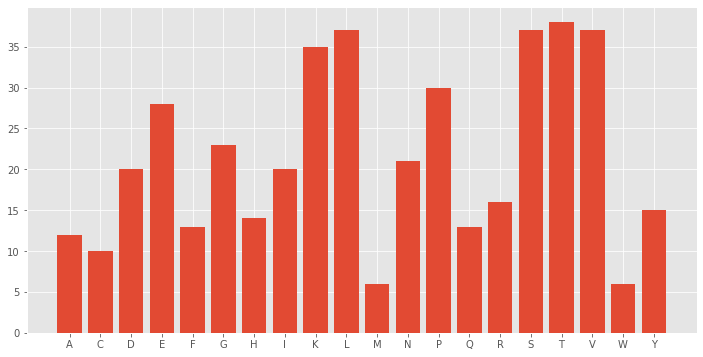

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.style.use('ggplot')

data = analyzed_seq.count_amino_acids()
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

### 1.3.2. Percent of amino acid contents

전체를 백으로 보았을때 각각의 아미노산 비율은 다음과 같습니다.

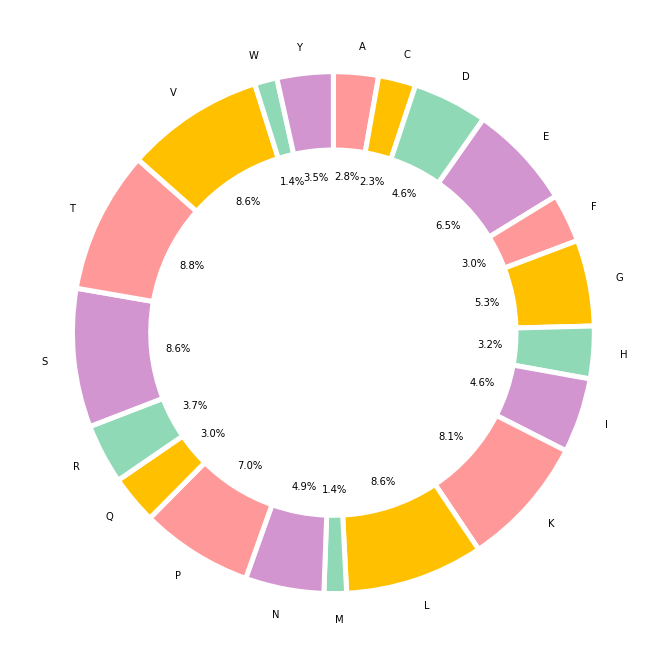

In [91]:
plt.figure(figsize=(12,12))

data = analyzed_seq.get_amino_acids_percent()
names = list(data.keys())
values = list(data.values())
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.3, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(values, labels=names, autopct='%.1f%%', startangle=90,
        counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [110]:
negative_res = data['D']+data['E']
positive_res = data['K']+data['R']

print(f'Total number of positively charged residues (Arg + Lys): {positive_res}.')
print(f'Total number of negatively charged residues (Asp + Glu): {negative_res}.')

Total number of positively charged residues (Arg + Lys): 51.
Total number of negatively charged residues (Asp + Glu): 48.


## 1.4. Theoretical pI

The isoelectric point (pI, pH(I), IEP), is the pH at which a molecule carries no net electrical charge or is electrically neutral in the statistical mean. 

The pI value can affect the solubility of a molecule at a given pH. Such molecules have minimum solubility in water or salt solutions at the pH that corresponds to their pI and often precipitate out of solution. Biological amphoteric molecules such as proteins contain both acidic and basic functional groups. 

In [93]:
print(f"Theoretical pI is {analyzed_seq.isoelectric_point():.3f}.")

Theoretical pI is 8.198


### 1.4.1. Charge of target protein ins PBS

Phosphate-buffered saline (abbreviated PBS) is a buffer solution (pH ~ 7.4) commonly used in biological research. 

> PBS has many uses because it is isotonic and non-toxic to most cells

In [99]:
#Calculates the charge of the protein for a given pH
charge = analyzed_seq.charge_at_pH(7.4)
if charge > 0:
    print(f"Target protein is positive charge({charge:.3f}) in PBS")
elif charge == 0:
    print(f"Target protein is neutral charge({charge:.3f}) in PBS")
else:
    print(f"Target protein is negative charge({charge:.3f}) in PBS")
# print(f"Charge of target protein in PBS(pH 7.4) is {analyzed_seq.charge_at_pH(7.4):.3f}.")

Target protein is positive charge(2.436) in PBS


## 1.5. Extinction coefficient

Extinction (or extinction coefficient) is defined as the ratio of maximum to minimum transmission of a beam of light that passes through a polarization optical train.

extinction coefficient in units of  M<sup>-1</sup> cm<sup>-1</sup>, at 280 nm measured in water.


## 1.5.1 with reduced cysteines


In [100]:
epsilon_prot = analyzed_seq.molar_extinction_coefficient()
print(f"Extinction coefficient of target protein at reduced condition is {epsilon_prot[0]}.")  # with reduced cysteines

Extinction coefficient of target protein at reduced condition is 55350


In [101]:
print(f'Abs 0.1%(=1 g/L) is {epsilon_prot[0]/analyzed_seq.molecular_weight():.3f}.')

Abs 0.1%(=1 g/L) is 1.142


## 1.5.2 with disulfid bridges

In [103]:
epsilon_prot = analyzed_seq.molar_extinction_coefficient()
print(f"Extinction coefficient of target protein at non-reduced condition is {epsilon_prot[1]}.")

Extinction coefficient of target protein at non-reduced condition is 55975.


In [105]:
print(f'Abs 0.1%(=1 g/L) is {epsilon_prot[1]/analyzed_seq.molecular_weight():.3f}.')

Abs 0.1%(=1 g/L) is 1.155.


## 1.6. Secondary structure fraction

A very useful method — .secondary_structure_fraction() — returns the fraction of amino acids that tend to be found in the three classical secondary structures. These are beta sheets, alpha helixes, and turns (where the residues change direction).

Secondary_structure_fraction: This methods returns a list of the fraction of amino acids which tend to be in helix, turn or sheet.
  + Amino acids in helix: V, I, Y, F, W, L.
  + Amino acids in turn: N, P, G, S.
  + Amino acids in sheet: E, M, A, L.


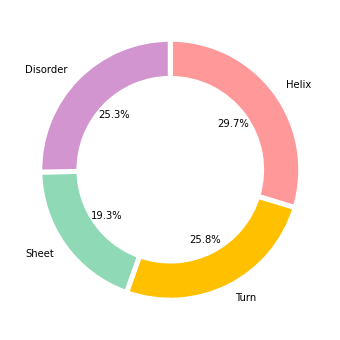

In [136]:
plt.figure(figsize=(6,6))

data = analyzed_seq.secondary_structure_fraction()
rest = (1-sum(analyzed_seq.secondary_structure_fraction()),)
names = ['Helix','Turn','Sheet','Disorder']
values = analyzed_seq.secondary_structure_fraction() + rest
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.3, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(values, labels=names, autopct='%.1f%%', startangle=90,
        counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

## GRAVY

> Protein GRAVY returns the GRAVY (grand average of hydropathy) value for the protein sequences you enter. The GRAVY value is calculated by adding the hydropathy value for each residue and dividing by the length of the sequence (Kyte and Doolittle; 1982).

A higher value is more hydrophobic. A lower value is more hydrophilic. We’ll discuss later how to generate residue by residue hydrophobicity later.

In [6]:
analyzed_seq.gravy()

-0.4598607888631092

## Protein Scales

Protein scales are a way of measuring certain attributes of residues over the length of the peptide sequence using a sliding window. Scales are comprised of values for each amino acid based on different physical and chemical properties, such as hydrophobicity, secondary structure tendencies, and surface accessibility. As opposed to some chain-level measures like overall molecule behavior, scales allow a more granular understanding of how smaller sections of the sequence will behave.

Some common scales include:

    kd → Kyte & Doolittle Index of Hydrophobicity [Original Article]
    Flex → Normalized average flexibility parameters (B-values) [Original Article]
    hw → Hopp & Wood Index of Hydrophilicity [Original Article]
    em → Emini Surface fractional probability (Surface Accessibility) [Original Book]
    
Let’s look at the Index of Hydrophobicity (kd) as an example. Here is the scale, where each residue has an associated value representing its level of hydrophobicity

Positive values are hydrophobic. Isoleucine (I) and Valine (V) are the most hydrophobic, and Arginine (R) and Lysine (K) are the most hydrophilic. Hydrophobic residues are generally located internally in the polypeptide, while hydrophilic residues are external, so this scale also gives a sense of how this polypeptide may be folded.

Protein scale analysis requires setting a window size over which an average value is calculated. You can also specify using the “edge” keyword how important the neighboring residues are, basically weighting their importance to the average for the window.

In [11]:
from Bio.SeqUtils.ProtParam import ProtParamData
analyzed_seq.protein_scale(window=7, param_dict=ProtParamData.kd)

[-1.242857142857143,
 -0.5285714285714286,
 -0.5285714285714286,
 -0.15714285714285717,
 -0.2857142857142857,
 0.24285714285714274,
 -0.028571428571428532,
 0.21428571428571414,
 -0.6142857142857141,
 -0.6142857142857142,
 -0.24285714285714274,
 0.5857142857142856,
 0.24285714285714274,
 1.0142857142857142,
 0.2714285714285714,
 0.0,
 0.4428571428571427,
 -0.8428571428571429,
 -1.9857142857142858,
 -0.9857142857142859,
 -0.6571428571428571,
 0.08571428571428578,
 0.35714285714285715,
 0.7714285714285716,
 0.7714285714285715,
 1.8714285714285714,
 1.2285714285714284,
 0.5142857142857145,
 -0.35714285714285715,
 -0.6285714285714284,
 -0.3428571428571428,
 0.19999999999999998,
 0.20000000000000004,
 0.19999999999999998,
 0.857142857142857,
 0.5285714285714287,
 0.4714285714285714,
 0.2285714285714286,
 0.09999999999999996,
 0.04285714285714277,
 -0.35714285714285726,
 -1.0,
 0.09999999999999996,
 1.3,
 0.6714285714285715,
 0.39999999999999997,
 -0.20000000000000004,
 -0.2571428571428571,


In [146]:
data = analyzed_seq.protein_scale(window=7, param_dict=ProtParamData.kd)
len(data)

425

In [ ]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')

data = analyzed_seq.protein_scale(window=7, param_dict=ProtParamData.kd)
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

Available Tools

- count_amino_acids: Simply counts the number times an amino acid is repeated in the protein sequence. Returns a dictionary {AminoAcid: Number} and also stores the dictionary in self.amino_acids_content.
- get_amino_acids_percent: The same as count_amino_acids, only returns the number in percentage of entire sequence. Returns a dictionary and stores the dictionary in self.amino_acids_content_percent.
- molecular_weight: Calculates the molecular weight of a protein.
- aromaticity: Calculates the aromaticity value of a protein according to Lobry & Gautier (1994, Nucleic Acids Res., 22, 3174-3180). It is simply the relative frequency of Phe+Trp+Tyr.
- instability_index: Implementation of the method of Guruprasad et al. (1990, Protein Engineering, 4, 155-161). This method tests a protein for stability. Any value above 40 means the protein is unstable (=has a short half life).
- flexibility: Implementation of the flexibility method of Vihinen et al. (1994, Proteins, 19, 141-149).
- isoelectric_point: This method uses the module IsoelectricPoint to calculate the pI of a protein.
- secondary_structure_fraction: This methods returns a list of the fraction of amino acids which tend to be in helix, turn or sheet.
  + Amino acids in helix: V, I, Y, F, W, L.
  + Amino acids in turn: N, P, G, S.
  + Amino acids in sheet: E, M, A, L.


## 1.9. Instability_index

Implementation of the method of Guruprasad et al. (1990, Protein Engineering, 4, 155-161). This method tests a protein for stability. Any value above 40 means the protein is unstable (=has a short half life).

In [140]:
instab = analyzed_seq.instability_index()
#Calculates the charge of the protein for a given pH
charge = analyzed_seq.charge_at_pH(7.4)
if charge >= 40:
    print(f"The instability index (II) of target protein is computed to be ({instab:.3f}) and it seems unstable.")
else:
    print(f"The instability index (II) of target protein is computed to be ({instab:.3f}) and it seems stable.")


The instability index (II) of target protein is computed to be (39.222) and it seems stable.
